[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1LQk3WVDt3Xn9MHwUZJrZydrYj-RBI2_p?usp=sharing)

In [1]:
! nvidia-smi

Wed May 15 14:03:08 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
! unzip /content/dataset.zip

Archive:  /content/dataset.zip
  inflating: imbalanced_data.csv     
  inflating: raw_data.csv            


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
imb_data = pd.read_csv("/content/imbalanced_data.csv")

In [5]:
imb_data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


<Axes: xlabel='label', ylabel='count'>

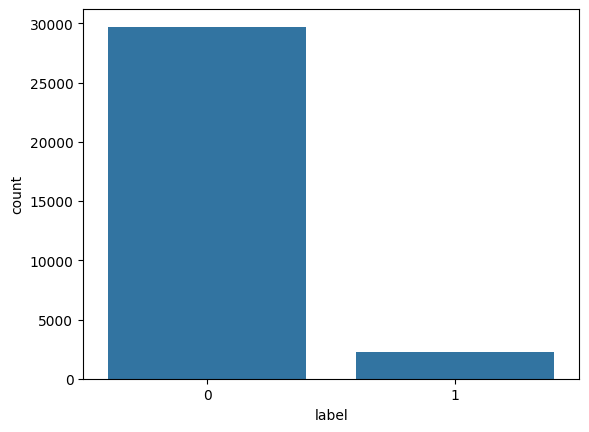

In [6]:
sns.countplot(x='label', data=imb_data)

In [7]:
imb_data.shape

(31962, 3)

In [8]:
imb_data.drop('id', axis=1, inplace=True)

In [9]:
raw_data = pd.read_csv("/content/raw_data.csv")

In [12]:
raw_data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [13]:
raw_data['class'].value_counts()

class
1    19190
2     4163
0     1430
Name: count, dtype: int64

In [14]:
raw_data.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [16]:
raw_data.drop(["Unnamed: 0","count","hate_speech","offensive_language","neither"],axis=1,inplace=True)

In [17]:
raw_data.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [18]:
## Lets copy the values of the class 1 into 0

raw_data[raw_data['class']== 0]['class']=1

<ipython-input-18-a47bd97b7424>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data[raw_data['class']== 0]['class']=1


In [19]:
raw_data.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [20]:
raw_data['class'].value_counts()

class
1    19190
2     4163
0     1430
Name: count, dtype: int64

In [21]:
raw_data[raw_data['class']== 0]

,class,tweet
85,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1..."
89,0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ..."
110,0,"""@DevilGrimz: @VigxRArts you're fucking gay, b..."
184,0,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL..."
202,0,"""@NoChillPaz: ""At least I'm not a nigger"" http..."
...,...,...
24576,0,this guy is the biggest faggot omfg
24685,0,which one of these names is more offensive kik...
24751,0,you a pussy ass nigga and I know it nigga.
24776,0,you're all niggers


In [22]:
raw_data['class'].replace({0:1},inplace=True)

In [23]:
raw_data['class'].unique()

array([2, 1])

In [24]:
raw_data['class'].replace({2:0},inplace=True)

In [25]:
raw_data['class'].unique()

array([0, 1])

<Axes: xlabel='class', ylabel='count'>

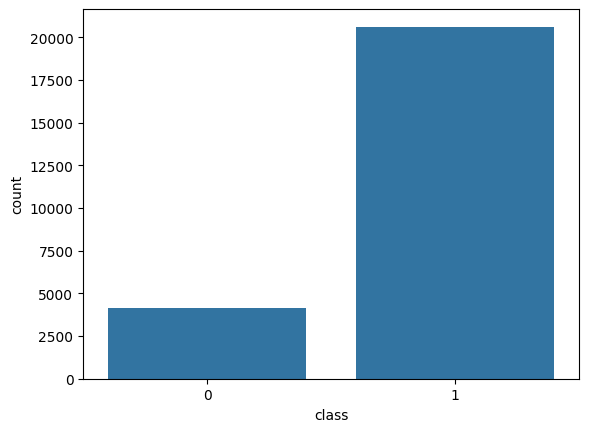

In [26]:
sns.countplot(x='class',data = raw_data)

In [27]:
imb_data.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [28]:
raw_data.rename(columns={'class':'label'},inplace=True)

In [29]:
raw_data.head()

,label,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [30]:
df = pd.concat([imb_data, raw_data], axis=0)

In [31]:
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [32]:
df.shape

(56745, 2)

In [33]:
df['label'].value_counts()

label
0    33883
1    22862
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

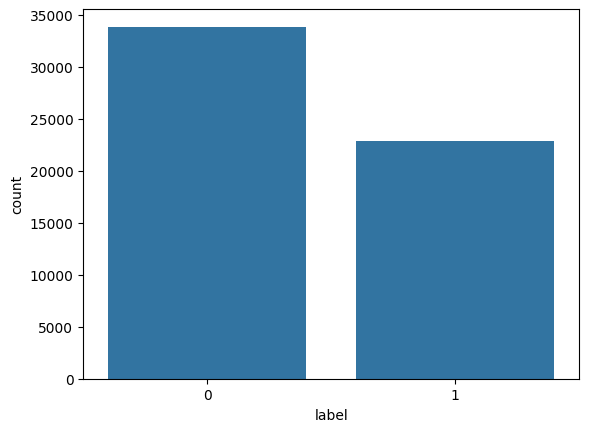

In [34]:
sns.countplot(x='label', data=df)

## Preprocessing

- lower case
- stopwatch

In [35]:
import re
import nltk
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [38]:
# Let's apply stemming and stopwords on the data
stemmer = nltk.SnowballStemmer("english")
stopword = set(stopwords.words('english'))

In [39]:
def data_cleaning(words):

  words = str(words).lower()
  words = re.sub('\[.*?\]', '',words)
  words = re.sub('https?://\S+|www\.\S+', '', words)
  words = re.sub('<.*?>+', '', words)
  words = re.sub('[%s]' % re.escape(string.punctuation), '', words)
  words = re.sub('\n', '', words)
  words = re.sub('\w*\d\w*', '', words)
  words = [word for word in words.split(' ') if words not in stopword]
  words=" ".join(words)
  words = [stemmer.stem(words) for word in words.split(' ')]
  words=" ".join(words)

  return words

In [40]:
df['tweet'][1]

1    @user @user thanks for #lyft credit i can't us...
1    !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
Name: tweet, dtype: object

In [41]:
df['tweet'][1].apply(data_cleaning)

1    user user thanks for lyft credit i cant use ca...
1     rt  boy dats coldtyga dwn bad for cuffin dat ...
Name: tweet, dtype: object

In [42]:
df['tweet'][8]

8    we won!!! love the land!!! #allin #cavs #champ...
8    " &amp; you might not get ya bitch back &amp; ...
Name: tweet, dtype: object

In [43]:
# let's apply the data_cleaning on the data.
df['tweet']=df['tweet'].apply(data_cleaning)

In [44]:
x = df['tweet']
y = df['label']

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
# Let's split the data into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 42)

print(len(x_train),len(y_train))
print(len(x_test),len(y_test))

42558 42558
14187 14187


# Feature Engineering

In [47]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

In [48]:
max_words = 50000
max_len = 300

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)

sequences = tokenizer.texts_to_sequences(x_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)

In [49]:
sequences_matrix

array([[    0,     0,     0, ...,   209, 13070,  4452],
       [    0,     0,     0, ...,   248,     3,   653],
       [    0,     0,     0, ...,     1,  1831, 41012],
       ...,
       [ 1126,   669,  2785, ...,   187,     1, 33462],
       [    0,     0,     0, ...,   954, 14416,   774],
       [    0,     0,     0, ...,   419,   378,    13]], dtype=int32)

In [50]:
from keras.models import Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, SpatialDropout1D
from keras.optimizers import RMSprop

In [51]:
# Creating model architecture.
model = Sequential()
model.add(Embedding(max_words,100,input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          5000000   
                                                                 
 spatial_dropout1d (Spatial  (None, 300, 100)          0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 5080501 (19.38 MB)
Trainable params: 5080501 (19.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [55]:
history = model.fit(sequences_matrix,y_train,batch_size=128,epochs = 2,validation_split=0.2)

Epoch 1/2
266/266 [==============================] - 270s 1s/step - loss: 0.1011 - accuracy: 0.9680 - val_loss: 0.1858 - val_accuracy: 0.9450
Epoch 2/2
266/266 [==============================] - 255s 961ms/step - loss: 0.0848 - accuracy: 0.9737 - val_loss: 0.1983 - val_accuracy: 0.9307


In [56]:
test_sequences = tokenizer.texts_to_sequences(x_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

In [57]:
test_sequences_matrix

array([[   29,  1856,  1260, ...,    13,    11,    29],
       [  471,   192,    31, ...,    16,     3, 17681],
       [    0,     0,     0, ...,   261,   331,  1505],
       ...,
       [    0,     0,     0, ...,    62,    10,   456],
       [    0,     0,     0, ...,     2,     4,     4],
       [    0,     0,     0, ...,     8,    88,  3776]], dtype=int32)

In [58]:
# Model evaluation
accr = model.evaluate(test_sequences_matrix,y_test)

444/444 [==============================] - 39s 88ms/step - loss: 0.2075 - accuracy: 0.9287


In [59]:
lstm_prediction = model.predict(test_sequences_matrix)

444/444 [==============================] - 37s 83ms/step


In [60]:
res = []
for prediction in lstm_prediction:
    if prediction[0] < 0.5:
        res.append(0)
    else:
        res.append(1)

In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
print(confusion_matrix(y_test,res))

[[7872  581]
 [ 431 5303]]


In [63]:
import pickle
with open('token.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle)

In [64]:
# Let's save the mdoel.
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [65]:
import keras

load_model=keras.models.load_model("model.h5")
with open('token.pickle', 'rb') as handle:
    load_tokenizer = pickle.load(handle)

In [66]:
test = 'i love this movie. this is a fantastic movie '

test=[data_cleaning(test)]
print(test)

seq = load_tokenizer.texts_to_sequences(test)
padded = pad_sequences(seq, maxlen=300)
print(seq)

pred = load_model.predict(padded)

print("pred", pred)
if pred<0.5:
    print("no hate")
else:
    print("hate and abusive")


['i love this movie this is a fantastic movie  i love this movie this is a fantastic movie  i love this movie this is a fantastic movie  i love this movie this is a fantastic movie  i love this movie this is a fantastic movie  i love this movie this is a fantastic movie  i love this movie this is a fantastic movie  i love this movie this is a fantastic movie  i love this movie this is a fantastic movie  i love this movie this is a fantastic movie ']
[[5, 28, 19, 597, 19, 11, 3, 1212, 597, 5, 28, 19, 597, 19, 11, 3, 1212, 597, 5, 28, 19, 597, 19, 11, 3, 1212, 597, 5, 28, 19, 597, 19, 11, 3, 1212, 597, 5, 28, 19, 597, 19, 11, 3, 1212, 597, 5, 28, 19, 597, 19, 11, 3, 1212, 597, 5, 28, 19, 597, 19, 11, 3, 1212, 597, 5, 28, 19, 597, 19, 11, 3, 1212, 597, 5, 28, 19, 597, 19, 11, 3, 1212, 597, 5, 28, 19, 597, 19, 11, 3, 1212, 597]]
1/1 [==============================] - 0s 300ms/step
pred [[0.00119202]]
no hate
